# Práctica 1: Primeros pasos con OpenCV

Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## TAREA 1: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

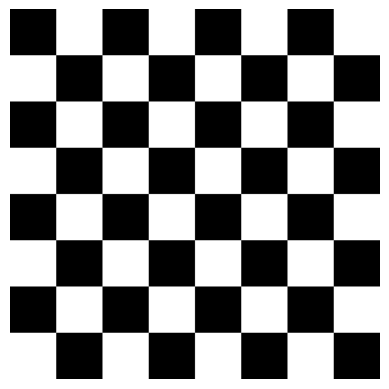

In [3]:
# Size of the chessboard
width = 800
height = 800

# Number of squares
n_squares = 8

# Size of the square
square_size = width // n_squares

# Create a single-plane image (white)
chessboard = np.ones((height, width), dtype=np.uint8) * 255

# Draw black squares in even positions: (0,0) (2,0) (4,0) (6,0) (8,0)
for i in range(0, height, square_size):
    for j in range(0, width, square_size):
        if (i // square_size + j // square_size) % 2 == 0:
            chessboard[i:i+square_size, j:j+square_size] = 0

# Show the image
plt.imshow(chessboard, cmap='gray')
plt.axis('off')  # Hide the axes
plt.show()

## TAREA 2: Crear una imagen estilo Mondrian

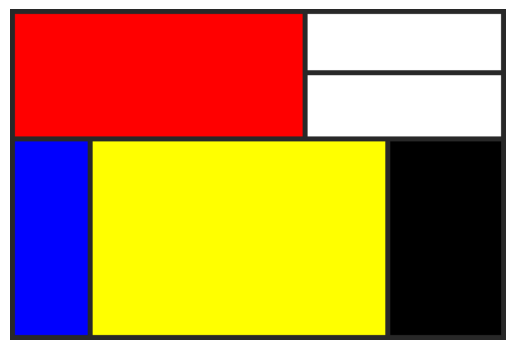

True

In [2]:
# Dimensiones de la imagen
ancho = 300
alto = 200

# Crear una imagen con tres planos (color) de fondo negro
color_img = np.zeros((alto, ancho, 3), dtype=np.uint8)

# Definir colores en formato BGR
rojo = (0, 0, 255)       # Rojo en RGB
azul = (255, 0, 0)       # Azul en RGB
amarillo = (0, 255, 255) # Amarillo en RGB
negro = (0, 0, 0)        # Negro en RGB
blanco = (255, 255, 255) # Blanco en 
gris = (40, 40, 40)

grosorBorde = 3
colorBorde = gris

def dibujar_rectangulo_con_borde(imagen, esquina_superior_izq, esquina_inferior_der, color_relleno, color_borde, grosor_borde):
    """
    Dibuja un rectángulo con relleno y borde píxel a píxel.
    
    Parámetros:
    - imagen: La imagen en la que se dibujará el rectángulo.
    - esquina_superior_izq: Coordenada (x, y) de la esquina superior izquierda del rectángulo.
    - esquina_inferior_der: Coordenada (x, y) de la esquina inferior derecha del rectángulo.
    - color_relleno: Color del relleno del rectángulo (en formato RGB).
    - color_borde: Color del borde del rectángulo (en formato RGB).
    - grosor_borde: Grosor del borde en píxeles.
    """
    # Coordenadas del rectángulo
    x1, y1 = esquina_superior_izq
    x2, y2 = esquina_inferior_der
    
    # Dibujar el borde píxel por píxel
    # Línea superior del borde
    for i in range(grosor_borde):
        for x in range(x1, x2):
            imagen[y1 + i, x] = color_borde
    
    # Línea inferior del borde
    for i in range(grosor_borde):
        for x in range(x1, x2):
            imagen[y2 - i - 1, x] = color_borde  # Agregamos -1 para evitar índice fuera de rango

    # Línea izquierda del borde
    for i in range(grosor_borde):
        for y in range(y1, y2):
            imagen[y, x1 + i] = color_borde

    # Línea derecha del borde
    for i in range(grosor_borde):
        for y in range(y1, y2):
            imagen[y, x2 - i - 1] = color_borde  # Agregamos -1 para evitar índice fuera de rango
    
    # Rellenar el centro del rectángulo
    for y in range(y1 + grosor_borde, y2 - grosor_borde):
        for x in range(x1 + grosor_borde, x2 - grosor_borde):
            imagen[y, x] = color_relleno

#Rectangulo rojo, superior izquierda
dibujar_rectangulo_con_borde(color_img, (0, 00), (180, 80), rojo, colorBorde, grosorBorde)
#Rectangulo azul
dibujar_rectangulo_con_borde(color_img, (0, 80-grosorBorde), (50, 200), azul, colorBorde, grosorBorde)
#Rectangulo blanco superior
dibujar_rectangulo_con_borde(color_img, (180-grosorBorde, 0), (300, 40), blanco, colorBorde, grosorBorde)
#Rectangulo blanco inferior
dibujar_rectangulo_con_borde(color_img, (180-grosorBorde, 40-grosorBorde), (300, 80), blanco, colorBorde, grosorBorde)
#Rectangulo amarillo
dibujar_rectangulo_con_borde(color_img, (50-grosorBorde, 80-grosorBorde), (230, 200), amarillo, colorBorde, grosorBorde)
#Rectangulo negro
dibujar_rectangulo_con_borde(color_img, (230-grosorBorde, 80-grosorBorde), (300, 200), negro, colorBorde, grosorBorde)

# Convertimos la imagen de BGR a RGB para mostrarla correctamente con matplotlib
color_img_rgb = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen resultante con matplotlib sin modificar el formato de la imagen
plt.imshow(color_img_rgb)
plt.axis('off')  # Ocultamos los ejes, para que los rectangulos superiores se vean bien
plt.show()

# Guardar la imagen en disco
cv2.imwrite('modrian.jpg', color_img)

## TAREA 3: Utilización de las funciones de dibujo de OpenCV

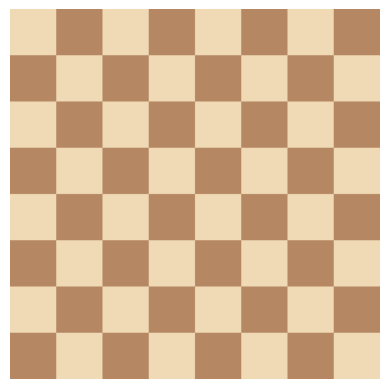

In [4]:
# Size of the chessboard
width = 800
height = 800
square_size = 100

# Create a single-plane image (white)
chessboard = np.ones((height, width, 3), dtype=np.uint8) * 255

cv2.rectangle(chessboard, (0,0), (width,height), (1,1,1), 10)

for i in range(0, width, square_size):
    for j in range(0, height, square_size):
        if (i // square_size + j // square_size) % 2 == 0:
            cv2.rectangle(chessboard, (j,i), (j+square_size, i+square_size), (240, 217, 181), -1)
        else:
            cv2.rectangle(chessboard, (j,i), (j+square_size, i+square_size), (181, 136, 99), -1)

# Show the image
plt.imshow(chessboard)
plt.axis('off') 
plt.show()

## TAREA 4: Modifica de forma libre los valores de un plano de la imagen

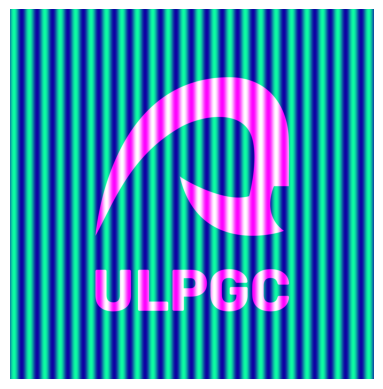

In [7]:
# Cargamos la imagen
imagen = cv2.imread('logo_ulpgc_vertical_acronimo_mancheta_azul.png')

# Verificamos si se cargo correctamente
if imagen is None:
    print("Error al cargar la imagen.")
    exit()

# Separamos la imagen en sus canales de color (bgr)
b, g, r = cv2.split(imagen)

# Modifica el plano verde, creando un efecto de onda sinusuidal
filas, columnas = g.shape
for i in range(filas):
    for j in range(columnas):
        g[i, j] = np.uint8(128 + 127 * np.sin(2 * np.pi * j / 50))

# Volvemos a combinar los canales
imagen_modificada = cv2.merge([b, g, r])

# Creamos un separador visual
altura, ancho, img_canal = imagen.shape
ancho_separador = 5  # Ancho del separador en píxeles
separador = np.full((altura, ancho_separador, 3), 255, dtype=np.uint8)  # Separador blanco

# Combinamos las imágenes y el separador horizontalmente
imagenes_juntas = np.hstack((imagen, separador, imagen_modificada))

# Obtenemos las dimensiones de la imagen combinada
altura_total, ancho_total, imgJuntas_canal = imagenes_juntas.shape

# Definimos una resolución de pantalla máxima (con pantallas pequeñas como la de un portatil, teníamos problemas de visualización)
resolucion_pantalla = (1280, 720)  # (ancho, altura)

# Calcula el factor de escala si la imagen es más grande que la pantalla
factor_escala_ancho = resolucion_pantalla[0] / ancho_total
factor_escala_altura = resolucion_pantalla[1] / altura_total
factor_escala = min(factor_escala_ancho, factor_escala_altura, 1)

# Redimensiona la imagen si es necesario
if factor_escala < 1:
    nuevo_ancho = int(ancho_total * factor_escala)
    nueva_altura = int(altura_total * factor_escala)
    imagenes_juntas = cv2.resize(imagenes_juntas, (nuevo_ancho, nueva_altura), interpolation=cv2.INTER_AREA)
else:
    nuevo_ancho = ancho_total
    nueva_altura = altura_total

# Crea una ventana que se ajusta al tamaño de la imagen
cv2.namedWindow('Mostramos Imagen Real y Modificada', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Mostramos Imagen Real y Modificada', nuevo_ancho, nueva_altura)
cv2.imshow('Mostramos Imagen Real y Modificada', imagenes_juntas)

# Mostramos la imagen modifica con matplotlib
plt.imshow(cv2.cvtColor(imagen_modificada, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

## TAREA 5: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 

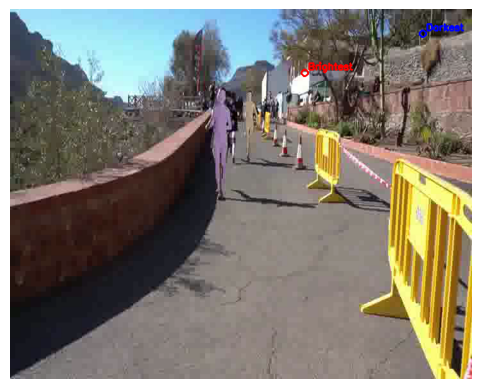

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
vid = cv2.VideoCapture('AyagauresResult.m4v')
font = cv2.FONT_HERSHEY_SIMPLEX
initial_frame = None

while(True):
    ret, frame = vid.read()
    if ret:
        # Convert frame to grayscale with shape
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Find the darkest and brightest pixels
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray)
        
        # Mark the darkest pixel
        cv2.circle(frame, min_loc, 5, (255, 0, 0), 2)  # Blue circle
        cv2.putText(frame, 'Darkest', (min_loc[0] + 5, min_loc[1] - 5), font, 0.5, (255, 0, 0), 2)
        
        # Mark the brightest pixel
        cv2.circle(frame, max_loc, 5, (0, 0, 255), 2)  # Red circle
        cv2.putText(frame, 'Brightest', (max_loc[0] + 5, max_loc[1] - 5), font, 0.5, (0, 0, 255), 2)
        
        # Display the frame
        cv2.imshow('Cam', frame)

        if initial_frame is None:
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
            initial_frame = frame
        
    if cv2.waitKey(20) == 27: 
        break

vid.release()
cv2.destroyAllWindows()

## TAREA 6: Elaboración de una propuesta pop art utilizando la entrada de la cámara web o vídeo

In [10]:
# Iniciamos la captura de video desde la cámara web (índice 0 por defecto)
vid = cv2.VideoCapture(0)

# Definimos el número de celdas para el efecto pixelado
ncells = 6  # Mientras mayor sea, mayor el tamaño de los cuadrados

while True:
    # Capturamos un fotograma de la cámara
    ret, frame = vid.read()

    # Verificamos si el fotograma se ha capturado correctamente
    if ret:
        # Obtenemos las dimensiones del fotograma original
        h, w, c = frame.shape  # Altura, ancho y canales de color del fotograma

        # Calculamos las dimensiones de la imagen reducida
        # Dividimos las dimensiones originales por el tamaño de las celdas
        down_width = int(w / ncells)
        down_height = int(h / ncells)

        # Redimensionamos el fotograma original a las dimensiones reducidas
        # Utilizamos interpolación por vecino más cercano para mantener colores sólidos
        down_frame = cv2.resize(
            frame,
            (down_width, down_height),
            interpolation=cv2.INTER_NEAREST
        )

        # Creamos una imagen negra con las dimensiones originales
        up_frame = np.zeros(
            (h, w, 3),  # Altura, ancho, canales de color
            dtype=np.uint8
        )

        # Obtenemos las dimensiones de la imagen reducida
        h2, w2, c2 = down_frame.shape

        # Recorremos cada píxel de la imagen reducida para reconstruir la imagen ampliada
        for y in range(h2):  # Iteramos sobre cada fila de la imagen reducida
            for x in range(w2):  # Iteramos sobre cada columna
                # Obtenemos el color del píxel reducido en la posición (x, y)
                # El formato es BGR (Blue, Green, Red)
                color = down_frame[y, x].tolist()
                # .tolist() convierte el array NumPy en una lista de Python
                # Esto es necesario porque cv2.rectangle espera una lista como color

                # Calculamos las coordenadas de la esquina superior izquierda del cuadrado
                # Multiplicamos la posición del píxel por el tamaño de las celdas para escalarla
                top_left_x = x * ncells
                top_left_y = y * ncells
                top_left = (top_left_x, top_left_y)

                # Calculamos las coordenadas de la esquina inferior derecha del cuadrado
                # Añadimos ncells para obtener el límite del cuadrado
                bottom_right_x = top_left_x + ncells
                bottom_right_y = top_left_y + ncells
                bottom_right = (bottom_right_x, bottom_right_y)

                # Dibujamos un rectángulo relleno (cuadrado) en la imagen ampliada
                # El rectángulo representa un píxel ampliado con el color correspondiente
                cv2.rectangle(
                    up_frame,          # Imagen donde se dibuja
                    top_left,          # Esquina superior izquierda
                    bottom_right,      # Esquina inferior derecha
                    color,             # Color del rectángulo (píxel reducido)
                    thickness=-1       # Grosor del borde (-1 para rellenar)
                )

        # Al completar el bucle, up_frame contiene la imagen ampliada con cuadrados de colores
        # Esto recrea la imagen original con un efecto pixelado de cuadrados

        cv2.imshow('Efecto PopArt', up_frame)

    if cv2.waitKey(20) == 27:
        break

vid.release()

cv2.destroyAllWindows()

2024-09-17 10:51:37.203 python[75282:6891611] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
